#  Feature Extarction 

## Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

## Load Dataset

In [3]:
book = pd.read_csv("new_book.xls")
book

,title,author,pages,rating,genres,SUMMARY
0,The Glass Castle,Jeannette Walls,288.0,4.28,Biography,tender moving tale unconditional love family d...
1,Angela's Ashes,Frank McCourt,452.0,4.12,Biography,imbued page frank mccourt astounding humor com...
2,Tuesdays with Morrie,Mitch Albom,210.0,4.12,Biography,maybe grandparent teacher colleague someone ol...
3,Running with Scissors,Augusten Burroughs,304.0,3.73,Biography,running scissors true story boy mother poet de...
4,"A Child Called ""It""",Dave Pelzer,184.0,4.11,Biography,alternate cover edition isbn ace x ace x chron...
...,...,...,...,...,...,...
4745,Confessions of a Tween Superheroine,J.M. Guy,187.0,4.15,Young Adult,jazmin skylyn gillette confession really plann...
4746,The Feds' Folly: Who Stole $17 Trillion?,Bill Brown,262.0,4.20,Young Adult,sequel fed folly stole trillion jones survivin...
4747,Unwind,Neal Shusterman,337.0,4.15,Young Adult,connor risa lev running life second civil war ...
4748,Pretty Little Liars,Sara Shepard,286.0,3.86,Young Adult,everyone something hide especially high school...


In [4]:
import re
import string
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_title(text):
    text = text.lower()                                                        # lower case
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))         # remove punctuations
    text_tokens = word_tokenize(text)                                          # Tokenization
    text_tokens = ' '.join(text_tokens)  
    return text_tokens
clean = lambda x: clean_title(x)

In [6]:
book["title"] = book["title"].apply(clean)
book

,title,author,pages,rating,genres,SUMMARY
0,the glass castle,Jeannette Walls,288.0,4.28,Biography,tender moving tale unconditional love family d...
1,angelas ashes,Frank McCourt,452.0,4.12,Biography,imbued page frank mccourt astounding humor com...
2,tuesdays with morrie,Mitch Albom,210.0,4.12,Biography,maybe grandparent teacher colleague someone ol...
3,running with scissors,Augusten Burroughs,304.0,3.73,Biography,running scissors true story boy mother poet de...
4,a child called it,Dave Pelzer,184.0,4.11,Biography,alternate cover edition isbn ace x ace x chron...
...,...,...,...,...,...,...
4745,confessions of a tween superheroine,J.M. Guy,187.0,4.15,Young Adult,jazmin skylyn gillette confession really plann...
4746,the feds folly who stole 17 trillion,Bill Brown,262.0,4.20,Young Adult,sequel fed folly stole trillion jones survivin...
4747,unwind,Neal Shusterman,337.0,4.15,Young Adult,connor risa lev running life second civil war ...
4748,pretty little liars,Sara Shepard,286.0,3.86,Young Adult,everyone something hide especially high school...


###  Checking for null values 

In [7]:
book.isnull().sum()

title      0
author     0
pages      0
rating     0
genres     0
SUMMARY    2
dtype: int64

###  Dropping the null values 

In [8]:
book.dropna(axis=0, inplace=True)

In [9]:
book.isnull().sum()

title      0
author     0
pages      0
rating     0
genres     0
SUMMARY    0
dtype: int64

# Feature Extraction 

## 1)  Bag of words 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
x = cv.fit_transform(book["SUMMARY"])
freq_words = pd.DataFrame({'term': cv.get_feature_names(), 'occurrences':np.asarray(x.sum(axis=0)).ravel().tolist()})
freq_words['frequency'] = freq_words['occurrences']/np.sum(freq_words['occurrences'])

In [12]:
freq_words.head(25)

,term,occurrences,frequency
0,aaron,17,0.000052
1,abandon,15,0.000046
2,abandoned,64,0.000195
3,abbey,21,0.000064
4,abducted,16,0.000049
5,ability,148,0.000450
6,able,150,0.000456
7,aboard,21,0.000064
8,abraham,17,0.000052
9,abroad,25,0.000076


##  2) TF-ID 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfid_vec = TfidfVectorizer( max_features= 5000, smooth_idf=True,ngram_range=(1,3))
doc_vec = tfid_vec.fit_transform(book["SUMMARY"])
names_features = tfid_vec.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)

In [15]:
data 

,aaron,abandon,abandoned,abbey,abducted,ability,able,aboard,abraham,abroad,...,young woman,younger,youngest,youth,youthful,zen,zero,zombie,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### we are using TF-ID because it is better than bag of words 

# Content based recommendation system 

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
sg = cosine_similarity(doc_vec, doc_vec)

In [18]:
indices = pd.Series(book.index, index= book['title']).drop_duplicates()

In [19]:
indices

title
the glass castle                           0
angelas ashes                              1
tuesdays with morrie                       2
running with scissors                      3
a child called it                          4
                                        ... 
confessions of a tween superheroine     4745
the feds folly who stole 17 trillion    4746
unwind                                  4747
pretty little liars                     4748
the knife of never letting go           4749
Length: 4748, dtype: int64

In [20]:
def recommend(title, sig=sg):
    idx = indices[title]
    sg_score = list(enumerate(sg[idx]))
    sg_score = sorted(sg_score, key= lambda x: x[1], reverse=True)
    sg_score = sg_score[1:11]
    book_indices = [i[0] for i in sg_score]
    return book['title'].iloc[book_indices]

In [21]:
recommend('a child called it')

4681              the host
3491          gentle rogue
4697                marked
4736          this lullaby
4742                  gone
4735              delirium
1523         sharp objects
3277            thornyhold
1741    the crocodile bird
1711     the tommyknockers
Name: title, dtype: object

<BarContainer object of 10 artists>

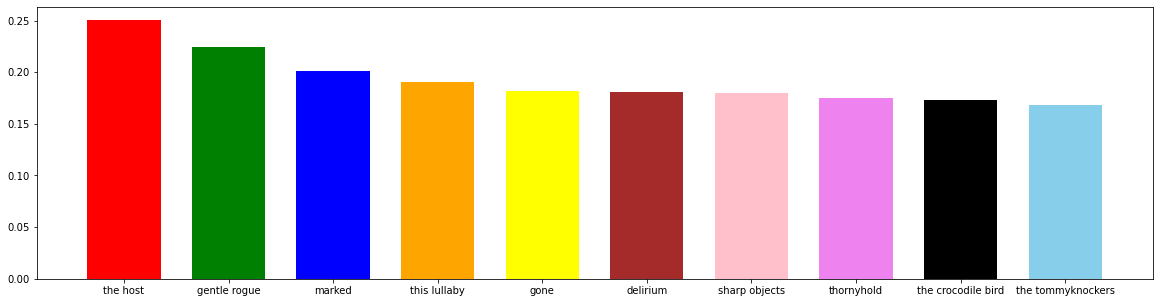

In [22]:
idx = indices['a child called it']
sg_score = list(enumerate(sg[idx]))
sg_score = sorted(sg_score, key= lambda x: x[1], reverse=True)
sg_score = sg_score[1:11]
height = [i[1] for i in sg_score]
plt.figure(figsize=(20,5))
plt.bar(recommend('a child called it'),height,width = 0.7,
        color = ['red', 'green','blue','orange','yellow','brown','pink','violet','black','skyblue'])

In [23]:
recommend('unwind')

3692                                      deathworld 1
33                             the tender bar a memoir
2246                                      bloodthirsty
1792    blood and thunder an epic of the american west
4229                                        excavation
3791                                  chariots of fire
1888              blood done sign my name a true story
2942                                   the zombie room
3557                                planet of the apes
1711                                 the tommyknockers
Name: title, dtype: object

<BarContainer object of 10 artists>

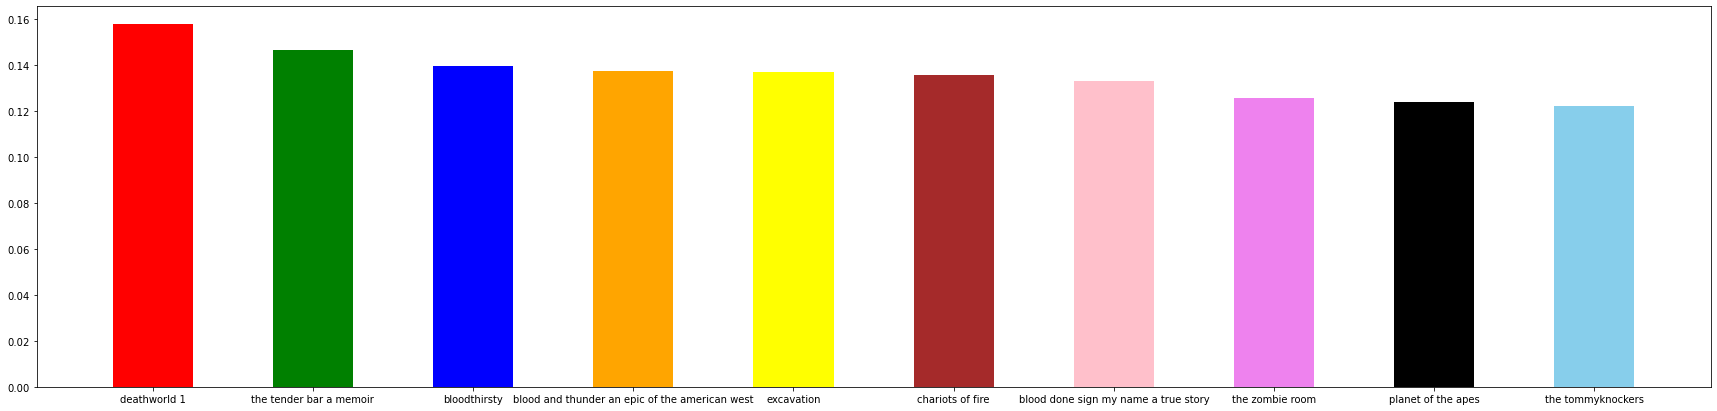

In [24]:
idx = indices['unwind']
sg_score = list(enumerate(sg[idx]))
sg_score = sorted(sg_score, key= lambda x: x[1], reverse=True)
sg_score = sg_score[1:11]
height = [i[1] for i in sg_score]
plt.figure(figsize=(30,7))
plt.bar(recommend('unwind'),height,width = 0.5,
        color = ['red', 'green','blue','orange','yellow','brown','pink','violet','black','skyblue'])

### we have recommended top 10 books based on book description 

### Saving as Pickle file

In [25]:
import pickle 

In [26]:
pickle.dump(book,open('book_dataset.pkl','wb'))
pickle.dump(tfid_vec,open('vectorization.pkl','wb'))
pickle.dump(sg,open('cosinesimilarity.pkl','wb'))